In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


In [2]:
dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

32768/30286 [================================] - 1s 27us/step


In [3]:
dataset_path

'/home/kdd/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [5]:
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t',
                         sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# clean the data

In [6]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [8]:
dataset.head(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA


In [9]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')

In [10]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


# split the data into train and test

In [11]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.shape, test_dataset.shape

((318, 10), (80, 10))

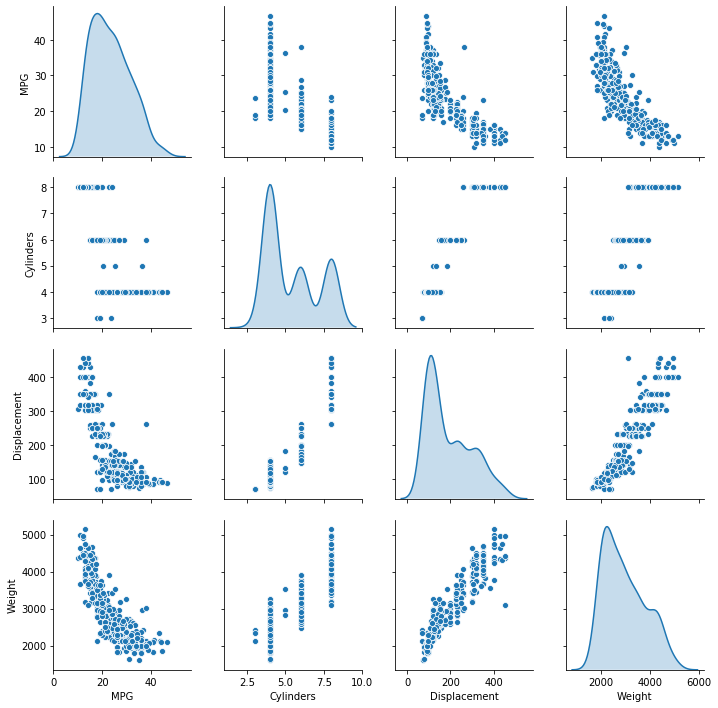

In [12]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind='kde')

In [13]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,318.000000,318.000000,318.000000,313.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.590566,5.427673,193.061321,104.067093,2963.823899,15.595912,75.946541,0.163522,0.194969,0.641509
std,7.913617,1.682941,103.812742,38.674662,844.749805,2.796282,3.705266,0.370424,0.396801,0.480313
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,100.250000,75.000000,2219.250000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,92.000000,2792.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,6.000000,259.500000,120.000000,3571.250000,17.300000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [14]:
train_stats = train_dataset.describe().pop('MPG')

In [15]:
train_stats = train_stats.transpose()

In [16]:
train_stats

count    318.000000
mean      23.590566
std        7.913617
min       10.000000
25%       17.125000
50%       22.750000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [17]:
train_labels = train_dataset.pop('MPG')
test_lables = test_dataset.pop('MPG')

In [18]:
train_labels.head(3)

65     14.0
132    25.0
74     13.0
Name: MPG, dtype: float64

In [21]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.00,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0


In [22]:
def norm(x):
    return (x- train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [23]:
normed_test_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
368,-0.84832,-0.780842,-0.415442,-0.383337,1.074315,1.633745,-0.441445,-0.491351,0.746369
370,-0.84832,-0.780842,-0.493013,-0.460283,0.216033,1.633745,-0.441445,-0.491351,0.746369
382,-0.84832,-0.819373,-0.880863,-0.850931,0.466365,1.633745,-0.441445,2.028805,-1.335607
384,-0.84832,-0.983129,-0.958434,-1.182390,0.037224,1.633745,-0.441445,2.028805,-1.335607
396,-0.84832,-0.703780,-0.648153,-0.401094,1.074315,1.633745,-0.441445,-0.491351,0.746369


# build the model

In [24]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer=keras.optimizers.RMSprop(0.001),
                 metrics=['mae', 'mse'])
    return model
model = build_model()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [26]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.18054108],
       [-0.0128926 ],
       [-0.40913957],
       [-0.15643366],
       [-0.03982055],
       [-0.47206295],
       [-0.47121048],
       [-0.17441195],
       [ 0.05001491],
       [ 0.00269233]], dtype=float32)

In [27]:
import tensorflow_docs as tfdocs

ModuleNotFoundError: No module named 'tensorflow_docs'

In [ ]:
epochs = 1000
history = model.fit(normed_train_data, train_labels, epochs=epochs, validation_split=0.2,
                   verbose=0, callbacks=[])